# Project Description

A new city manager for Airbnb has started in Dublin and wants to better understand:

- What guests are searching for in Dublin,
- Which inquiries hosts tend to accept.
- What gaps exist between guest demand and host supply
- Any other information that deepens the understanding of the data

The goal is to analyze, understand, visualize, and communicate the demand/supply of the market in Dublin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
searches=pd.read_csv("datasets\searches.tsv",sep = "\t",na_values =['NaT','NaN'])
searches.head(2)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN


In [6]:
contacts= pd.read_csv("datasets\contacts.tsv",sep = "\t")
contacts.head(2)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10


# searches Dataset

In [28]:
searches.isnull().sum()/len(searches)*100

ds                       0.000000
id_user                  0.000000
ds_checkin              33.156113
ds_checkout             33.156113
n_searches               0.000000
n_nights                33.156113
n_guests_min             0.000000
n_guests_max             0.000000
origin_country           0.000000
filter_price_min        62.722109
filter_price_max        62.722109
filter_room_types       54.694015
filter_neighborhoods    96.233595
dtype: float64

In [38]:
# Neighborhoods columns contain 96 % of null values, So we can drop column based on high null values
searches.drop(columns = ['filter_neighborhoods'],inplace = True)

In [42]:
searches.dtypes

ds                     datetime64[ns]
id_user                        object
ds_checkin             datetime64[ns]
ds_checkout            datetime64[ns]
n_searches                      int64
n_nights                      float64
n_guests_min                    int64
n_guests_max                    int64
origin_country                 object
filter_price_min              float64
filter_price_max              float64
filter_room_types              object
length_preperation    timedelta64[ns]
dtype: object

In [40]:
# Changing ds,ds_checkout,ds_checkin columns to datetime column
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches["ds_checkin"])
searches['ds_checkout'] = pd.to_datetime(searches["ds_checkout"])

In [41]:
# how soon they want the room
searches['length_preperation'] = searches['ds_checkin'] - searches['ds']

I used the difference between the ds_checkin column and ds search column to find out how soon people want their rooms. This information might be useful since I can find out how soon people start planning their trips and lead to better business decisions.

In [98]:
# calculate skewness in searches dataset
searches.skew(axis=0, numeric_only=True, skipna=True)

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

All numeric columns have a Fisher-Pearson coefficient value greater than 1. This results in a positive skewness. Can experiment with log transformation, a type of transformation method, to reduce skewness in the future.

1) Let's find out when are people making these searches. With this information, I can calculate when people start thinking about going to Dublin for vacation for marketing purposes.

In [11]:
searches['ds'].value_counts()

2014-10-14    3011
2014-10-13    2973
2014-10-06    2758
2014-10-12    2716
2014-10-01    2628
2014-10-02    2627
2014-10-05    2612
2014-10-07    2606
2014-10-08    2584
2014-10-09    2430
2014-10-03    2363
2014-10-04    2226
2014-10-11    2122
2014-10-10    2081
Name: ds, dtype: int64

<Axes: >

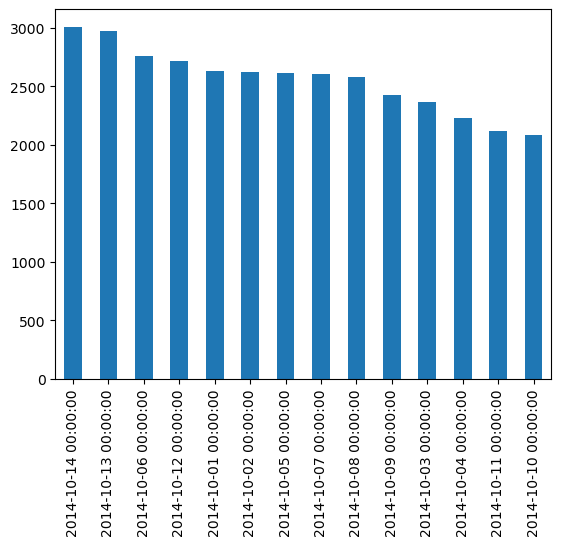

In [17]:
# date of searches conducted
searches['ds'].value_counts().plot(kind = 'bar')

I can observe that all date searches were between October 1st to October 14th. No major variation in when search was conducted between these dates

## Distribution

2) First, let's start with the minimum and maximum guests. I can find the number of people searched for when booking rooms.

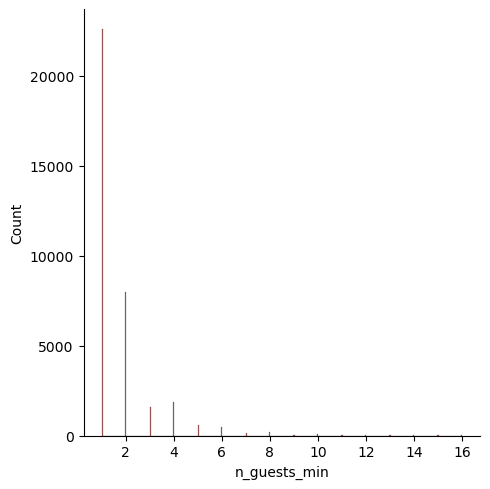

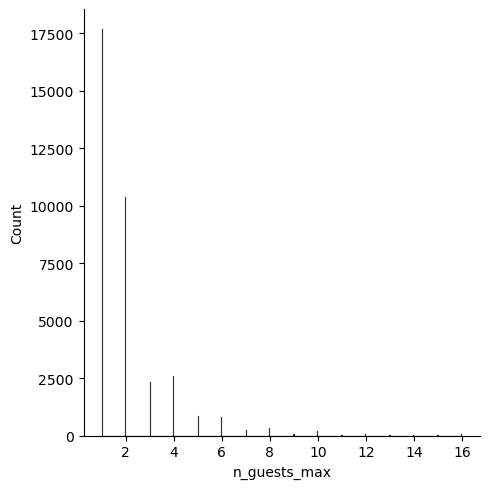

In [12]:
# distribution plot of n_guests_min and n_guests_max
sns.displot(searches, x='n_guests_min', color='brown')
sns.displot(searches, x='n_guests_max', color='black')
plt.show()

In the two plots of min and max guests gives the information about the  no of guests searched for booking rooms.\
Both distribution showing same, first option is 1 and next option is 2.

3) Let's understand what is the maximum price people are willing to pay for a room.

In [47]:
searches['filter_price_max'].max()

1073741823.0

In [44]:
# percentage of dataset with a filter_price_max above 600
print(len(searches[searches['filter_price_max']>100000]) / len(searches['filter_price_max'])*100, '%')

3.1312085513613344 %


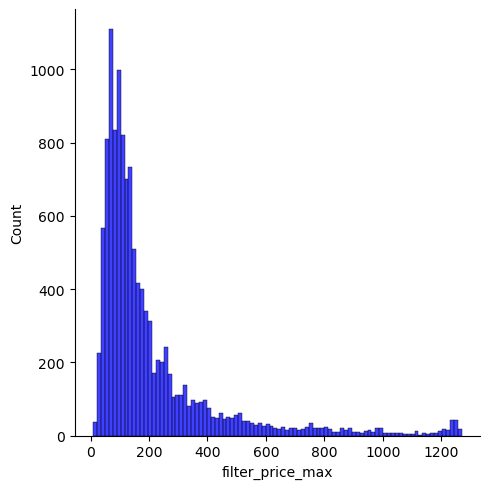

In [57]:
# distribution of filter_price_max of searches

# removing the set upper limit
searches_maxprice_removed = searches[searches['filter_price_max'] <100000]

# distribution plot of filter_price_max column
sns.displot(x=searches_maxprice_removed["filter_price_max"], color='blue')
plt.show()

In [ ]:
Filter_price_max was chosen instead of filter_price_min due to the min usually being set at $0.

To further help better visualize the trend we set the filter price max as less 100000. 100000 was chosen as the limit since only 3.13 % of the dataset has values greater than 100000.

Most people search for a room below $200/night with most searches around $100/night. 59% of people searched for rooms between $60 and $130 a night.

4) Let's calculate how soon people want rooms when booking.

In [12]:
searches.columns

Index(['ds', 'id_user', 'ds_checkin', 'ds_checkout', 'n_searches', 'n_nights',
       'n_guests_min', 'n_guests_max', 'origin_country', 'filter_price_min',
       'filter_price_max', 'filter_room_types', 'length_preperation'],
      dtype='object')

In [44]:
searches.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preperation
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00


<Axes: ylabel='Frequency'>

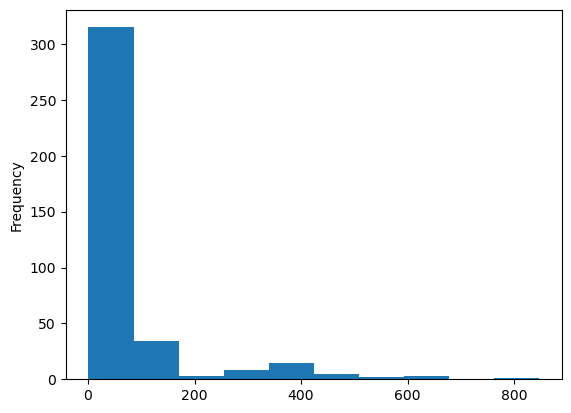

In [47]:
searches['length_preperation'].value_counts().plot(kind ='hist')

9.396423874415872 % 



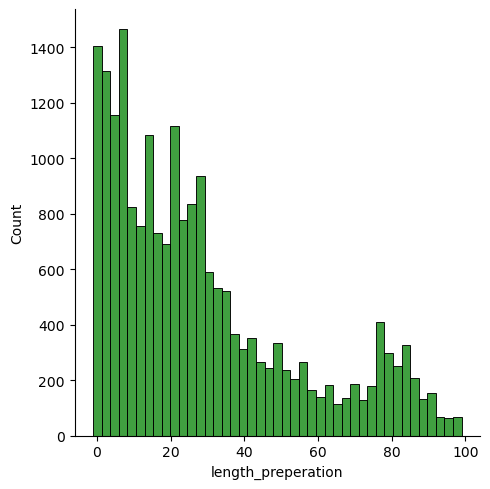

In [56]:
distribution = searches["length_preperation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100]) / len(distribution)*100, '% \n')
# remove values beyond 100 days
distribution = distribution[distribution < 100]

# distribution plot of length_preperation column
sns.displot(x=distribution, color='green')
plt.show()

100 days was chosen as the limit since only 9.40% of the dataset exists beyond that.

Based on this data, around 37% of people search for a room within 2 weeks
- 23.7% search for rooms within a week
- 13.46% search for rooms between 1-2 weeks
- 12.51% search for rooms between 2-3 weeks

5) Let's find the distribution of the number of nights people want to stay.

4.737387021854101 % 



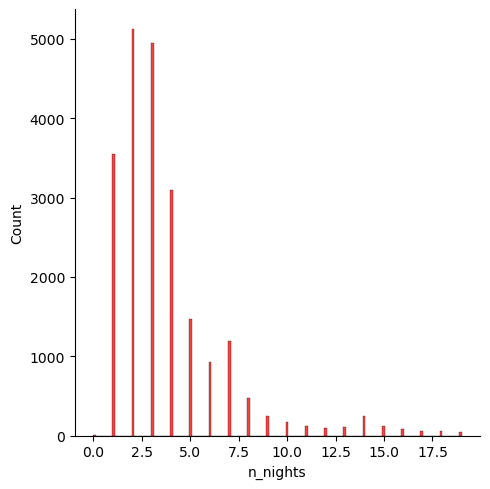

In [64]:
# distribution of n_nights of searches

# percentage of dataset beyond 20 nights
print(len(searches[searches['n_nights'] > 20])/len(searches['n_nights'])*100, '% \n')

# remove n_nights beyond 20 days
searches_within_twenty = searches[searches['n_nights'] < 20]

# distribution plot of length_preperation column
sns.displot(searches_within_twenty, x='n_nights', color = 'red')
plt.show()

Removing n_nights beyond 20 days since only 4.74% of the dataset exists beyond 20 days.\
Around 70% of people want to stay between 1-4 days, mostly 2 or 3.\

People generally don’t want to stay for more than a week (only 15% want to stay more than a week)

6) Let's calculate when people want to take a trip to Dublin.

Use the check-in date to calculate this.

In [66]:
# 8 number summary of n_nights column
searches['n_nights'].describe()

count    23888.000000
mean         7.672765
std         21.557614
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        399.000000
Name: n_nights, dtype: float64

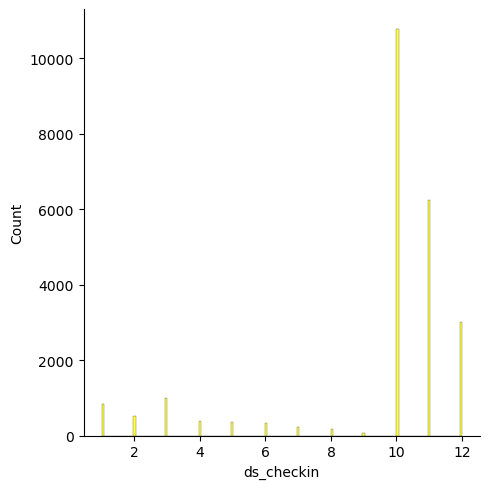

In [67]:
# distribution of months of ds_checkin of searches
checkin_month = pd.DatetimeIndex(searches['ds_checkin']).month

# distribution plot of length_preperation column
sns.displot(checkin_month, color = 'yellow')
plt.show()

Used only the check-in month, cause checkout is usually within 5/6 days. The mean of `n_nights` after removing the upper outlier limit is 5.6, so assumed 5 or 6 days after the check-in date people usually checkout.\

About 80% of searches were in the October-December.

Breakdown:
- 45.05% in October
- 26.1% in November
- 12.6% in December

7) I want to understand which are the most common type of rooms searched for.

In [69]:
# types of rooms searched for
searches['filter_room_types'].unique()[0:15] # display first 15 unique values

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

On the Airbnb website, there are only 4 values in the type of place:
- Entire Place
- Private Room
- Hotel Room
- Shared Room

I could also search how often these 4 strings occur.

8) The origin_country column  indicates which country the search came from. I can find the most common countries searched from.

In [80]:
# find top 15 countries where searches originate from

# group by origin country and finding the count of each country
search_origin = searches.groupby("origin_country").agg({'origin_country' : 'count'})
search_origin.columns = ['count']

search_origin = search_origin.sort_values('count', ascending = False) # sort count in descending order
search_origin.nlargest(15,'count') # find the 15 largest values

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


Ireland (IE), the United States (US), and Great Britain (GB) comprise 48% of searches. Dublin destinations could be promoted within these 3 countries more for the winter months.

# contacts Dataset

In [93]:
contacts= pd.read_csv("datasets\contacts.tsv",sep = "\t")
contacts.head(2)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10


In [94]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_guest        7823 non-null   object
 1   id_host         7823 non-null   object
 2   id_listing      7823 non-null   object
 3   ts_contact_at   7823 non-null   object
 4   ts_reply_at     7219 non-null   object
 5   ts_accepted_at  3627 non-null   object
 6   ts_booking_at   2174 non-null   object
 7   ds_checkin      7823 non-null   object
 8   ds_checkout     7823 non-null   object
 9   n_guests        7823 non-null   int64 
 10  n_messages      7823 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 672.4+ KB


In [102]:
contacts['ts_accepted_at'].value_counts(dropna = False)
'''Here, we can create the one more columns as 
Accepted the room  as True
Not Accepted the room as False (i.e NaT - No Datetime)
'''

'Here, we can create the one more columns as \nAccepted the room  as True\nNot Accepted the room as False (i.e NaT - No Datetime)\n'

In [95]:
# manipulation of contacts dataset

# convert date columns to datetime data type 
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])

contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)
contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

# understand dataset with describe function
display(contacts.dtypes)
display(contacts.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

,n_guests,n_messages,length_stay
count,7823.000000,7823.000000,7823
mean,2.422600,6.319954,5 days 19:25:32.864629937
std,1.617347,6.472827,14 days 23:45:24.447710564
min,1.000000,1.000000,1 days 00:00:00
25%,1.000000,2.000000,2 days 00:00:00
50%,2.000000,4.000000,3 days 00:00:00
75%,3.000000,8.000000,5 days 00:00:00
max,16.000000,102.000000,334 days 00:00:00


In [96]:
# calculate skewness in contacts dataset
display(contacts.skew(axis=0, numeric_only=True, skipna=True))

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

All columns have a Fisher-Pearson coefficient value greater than 1. Except for accepted, which could be due to it being derived from an existing column. 

Can experiment with box-cox transformation, a type of transformation method, to reduce skewness in the future. The criteria is that the data has to be positive. 

For my info: Another transformation method is the Square Root Transform.

1) Finding the distribution of the number of the guests staying.

This would be useful in comparing how many guests were searched for vs how many guests the room was booked for.

1.4572414674677232 % 



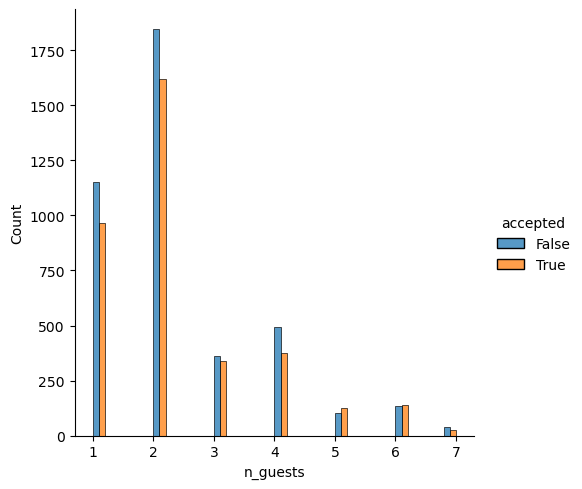

In [104]:
# number of guests stayed
print(len(contacts[contacts['n_guests'] >= 8])/len(contacts['n_guests'])*100, '% \n')

contacts_less8 = contacts[contacts['n_guests'] < 8]
sns.displot(contacts_less8, x='n_guests', hue='accepted', multiple="dodge")
plt.show()

Choosing less than 8 guests, since only 1.46% (114 values) of the contacts dataset has 8 or more guests. To better visualize the majority distribution we removed rows with 8 or more guests.

2 guests is the most popular option to book, but 1 guest is the most popularly searched option (as observed from the search dataset). This leads me to believe there could potentially be a lack of supply of single guest rooms.

In [105]:
# conversion rate from accepting to booking
contacts['ts_booking_at'].count() / contacts['ts_accepted_at'].count()

0.5993934381031155

As seen from the search dataset during the common check-in dates, the popular dates are October-December.

2) I want to find out if there happen to be major difference between people rejected vs accepted.

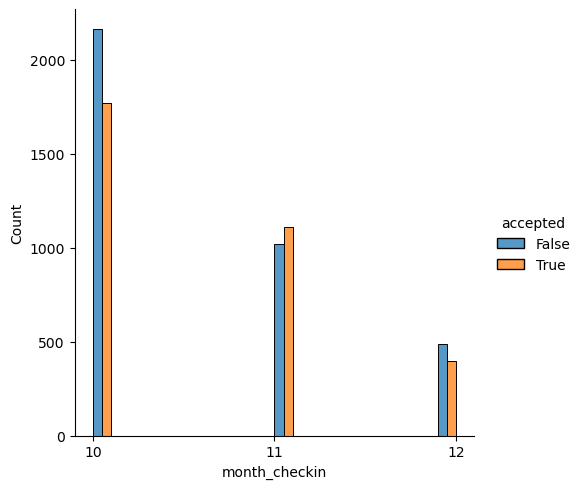

In [107]:
# timeframe of when guests or accepted vs rejected
contacts['month_checkin'] = contacts['ds_checkin'].dt.month # extract month from checkin date
contacts_checkin = contacts[contacts['month_checkin'] > 9] # use only peak season months (Oct, Nov, Dec)

# distribution of checkin among October, November, and December and split by acceptance
sns.displot(contacts_checkin, x='month_checkin', hue='accepted', multiple="dodge")
plt.xticks([10, 11, 12])
plt.show()

There does not appear to be any major variation between accepted vs rejected users.

In [108]:
# merge datasets for more analysis
merged_datasets = contacts.merge(searches, left_on='id_guest', right_on='id_user')

6.335856462012895 % 



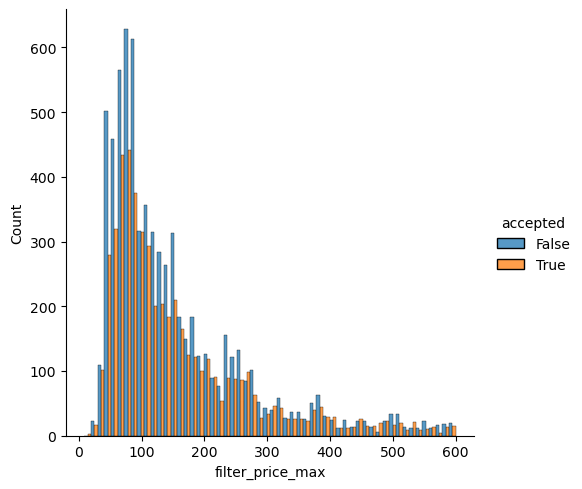

In [109]:
# check difference between prices searched between accepted/rejected applicants
print(len(merged_datasets.loc[(merged_datasets['filter_price_max'] >= 600)])/len(merged_datasets['filter_price_max'])*100, 
      '% \n')

merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x="filter_price_max", hue="accepted", multiple="dodge")
plt.show()

To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 6.33% of the dataset has values greater than 600.

In [110]:
# classify dataset based on filter_price_max

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'
    
    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'
    
    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'
    
    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'
    
    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

,accepted
classification_max_price,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500-600,0.422297
600+,0.433122


As seen, more people are rejected compared than accepted at around 43% acceptance rate for all `filter_price_max`.

I wanted to find out of there are any differences in the acceptance rate by the country of origon of the potential guests. 

In [112]:
# find the acceptance rate by country
dataset_country = merged_datasets[['origin_country', 'accepted']]

# find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

# find acceptance count by country
country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

# merge datasets for easier manipulation 
acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) # merge accepted count
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) # merge total country count
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] # 100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

# divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
72,AT,True,83,239,0.347280
54,RU,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729



India (IN) has the lowest acceptance rate of 15%, which is half of the acceptance rate compared to the second lowest accepted country, Croatia (HR).

Denmark (DK) has the highest acceptance rate but low application numbers. Might want to consider increasing marketing to lead to higher demand. 